## GeoPandas
- Pandas + spatial operations on geometric types
- If you use Python, you should DEFINITELY know Pandas
    - Probably the most useful data wrangling tool in the Python toolbox
    - Allows you to work with data frame structures in Python (as in the wonderful world of R)
    - Easy, expressive merging, joining, group-by operations, reshaping of heterogeneous typed columnar data

### Import GeoPandas and explore
- Geopandas has built in method to see datasets avaialable with GeoPandas
- We'll read in, plot and explore NYC borrough boundary dataset that comes with GeoPandas

In [1]:
import geopandas as gp
gp.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

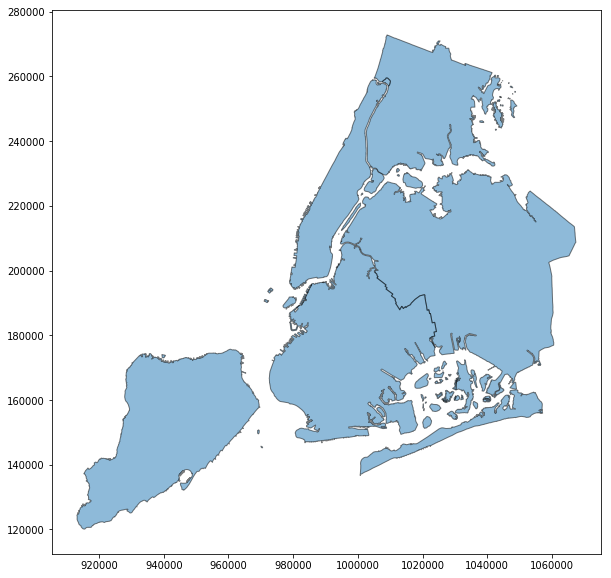

In [3]:
df = gp.read_file(gp.datasets.get_path('nybb'))
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

- We typically read in shapefiles and work with GeoDataFrames in GeoPandas
- It looks and acts for the most part just like a Pandas DataFrame

In [4]:
type(df)

geopandas.geodataframe.GeoDataFrame

We can explore our GeoDataFrame the same as we would in Pandas

In [5]:
df.describe()

,BoroCode,Shape_Leng,Shape_Area
count,5.000000,5.000000,5.000000e+00
mean,3.000000,558317.333911,1.685981e+09
std,1.581139,249002.452978,9.034868e+08
min,1.000000,330470.010332,6.364715e+08
25%,2.000000,359299.096471,1.186925e+09
50%,3.000000,464392.991824,1.623820e+09
75%,4.000000,741080.523166,1.937479e+09
max,5.000000,896344.047763,3.045213e+09


In [10]:
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


- Most columns look we work with same as we would in a Pandas DataFrame
- One big difference is the column containing geometry that makes things spatial

In [4]:
type(df.BoroName)

pandas.core.series.Series

In [5]:
type(df.geometry)

geopandas.geoseries.GeoSeries

In [8]:
type(df.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

Let's stop and look at what shapely is all about...

- Shapely is it's own Python package
- Uses functions from GEOS (port of the Java Topology Suite (JTS))
- GEOS is the geometry engine for PostGIS
- Shapely allows PostGIS geometry operations outside a RDBMS
- Shapely adheres to Open Geospatial Consortium Simple Features specs
- Nicely Pythonic approaches to geometric operations on spatial data


In [2]:
import rasterio as rio